# Recurrent Neural Network - RNN

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('data/Alcohol_Sales.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [21]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [22]:
df.columns = ['Sales']

<Axes: xlabel='DATE'>

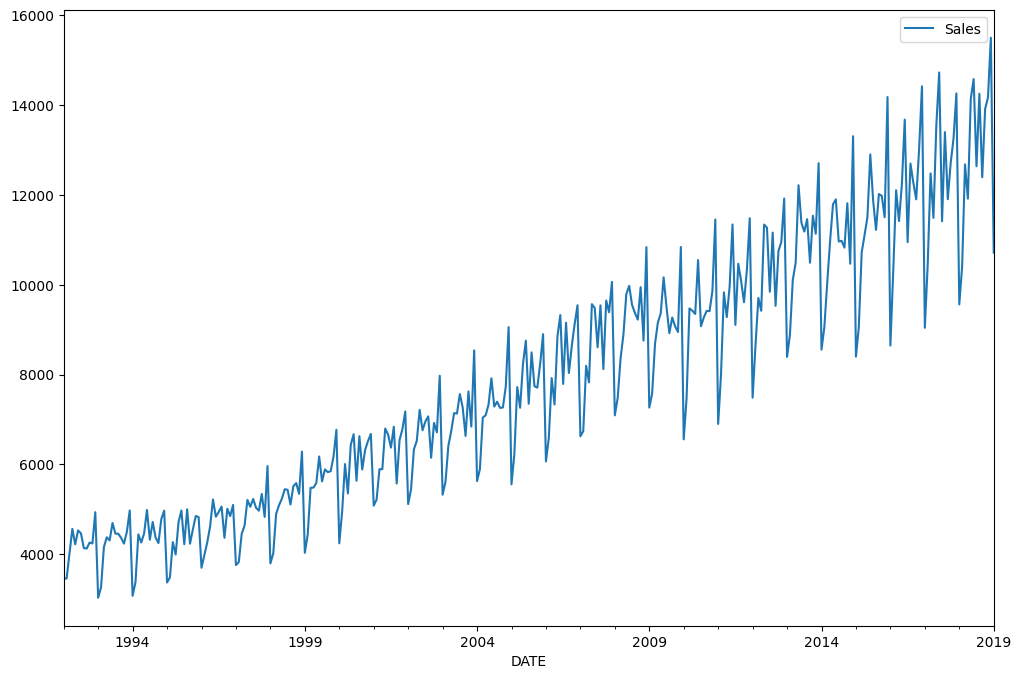

In [23]:
df.plot(figsize=(12,8))

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(df['Sales'])

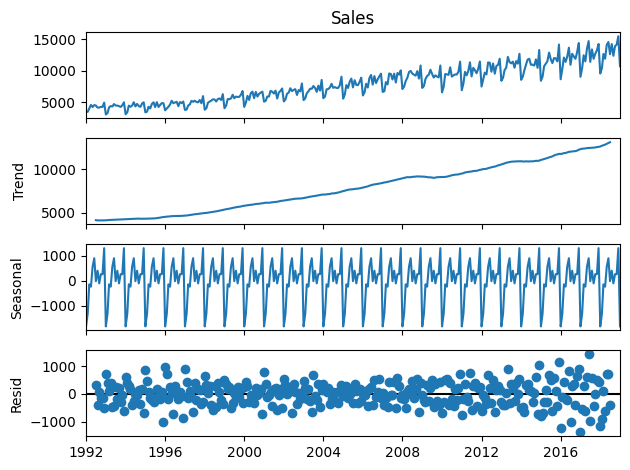

In [25]:
results.plot();

## Split Data

In [26]:
len(df)

325

In [27]:
train = df.iloc[:325-12]
test = df.iloc[325-12:]

In [28]:
len(test)

12

## Scale Data

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# FIT ONLY TRAIN DATA, OTHERWISE LEAKS SOME OF THE TEST DATA
scaler.fit(train)

scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

## Generate time series data to cover test data

In [30]:
from keras.preprocessing.sequence import TimeseriesGenerator
# define generator
n_input = 2
n_features = 1
#x and y should come from same source - scaled_train, scaled_train
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

2024-03-15 12:57:45.351005: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [31]:
len(scaled_train)

313

In [32]:
len(generator)

311

In [33]:
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

# Create the Model

In [34]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()

2024-03-15 12:58:10.527919: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-03-15 12:58:10.528030: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: 86034e89439d
2024-03-15 12:58:10.528151: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: 86034e89439d
2024-03-15 12:58:10.535572: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 530.30.2
2024-03-15 12:58:10.535714: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 530.30.2
2024-03-15 12:58:10.535752: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 530.30.2


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit_generator(generator,epochs=20)

/tmp/ipykernel_2980/3989200883.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=20)


Epoch 1/20


2024-03-15 12:58:34.777117: I tensorflow/core/common_runtime/executor.cc:1209] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


301/301 [==============================] - 3s 3ms/step - loss: 0.0188
Epoch 2/20
301/301 [==============================] - 1s 3ms/step - loss: 0.0113
Epoch 3/20
301/301 [==============================] - 1s 3ms/step - loss: 0.0092
Epoch 4/20
301/301 [==============================] - 1s 3ms/step - loss: 0.0074
Epoch 5/20
301/301 [==============================] - 1s 3ms/step - loss: 0.0072
Epoch 6/20
301/301 [==============================] - 1s 3ms/step - loss: 0.0068
Epoch 7/20
301/301 [==============================] - 1s 3ms/step - loss: 0.0066
Epoch 8/20
301/301 [==============================] - 1s 3ms/step - loss: 0.0061
Epoch 9/20
301/301 [==============================] - 1s 3ms/step - loss: 0.0041
Epoch 10/20
301/301 [==============================] - 1s 3ms/step - loss: 0.0035
Epoch 11/20
301/301 [==============================] - 1s 3ms/step - loss: 0.0029
Epoch 12/20
301/301 [==============================] - 1s 3ms/step - loss: 0.0023
Epoch 13/20
301/301 [===============

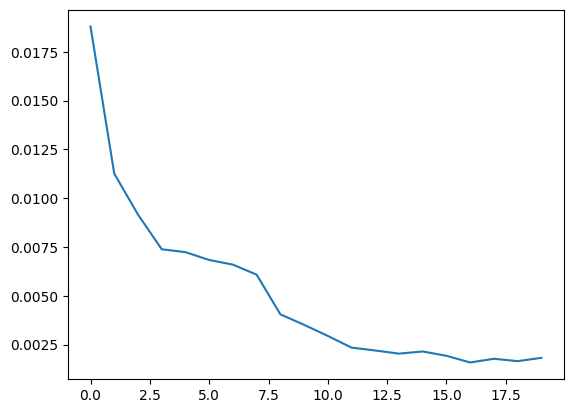

In [36]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

## Evaulate the test data

In [37]:
first_eval_batch = scaled_train[-12:]
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))
model.predict(first_eval_batch)

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))



1/1 [==============================] - 0s 233ms/step


In [38]:
current_batch.shape

(1, 12, 1)

In [39]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[ 0.80776135],
        [ 0.72313873],
        [ 0.89870929],
        [ 1.        ],
        [ 0.71672793],
        [ 0.88648602],
        [ 0.75869732],
        [ 0.82742115],
        [ 0.87443371],
        [ 0.96025301],
        [ 0.5584238 ],
        [99.        ]]])

In [40]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
# go beyond len(test) to go into the unknown future (no way to measure success except wait!)
for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 15ms/step


## Inverse predictions and compare

In [41]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions

/tmp/ipykernel_2980/4268826688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='DATE'>

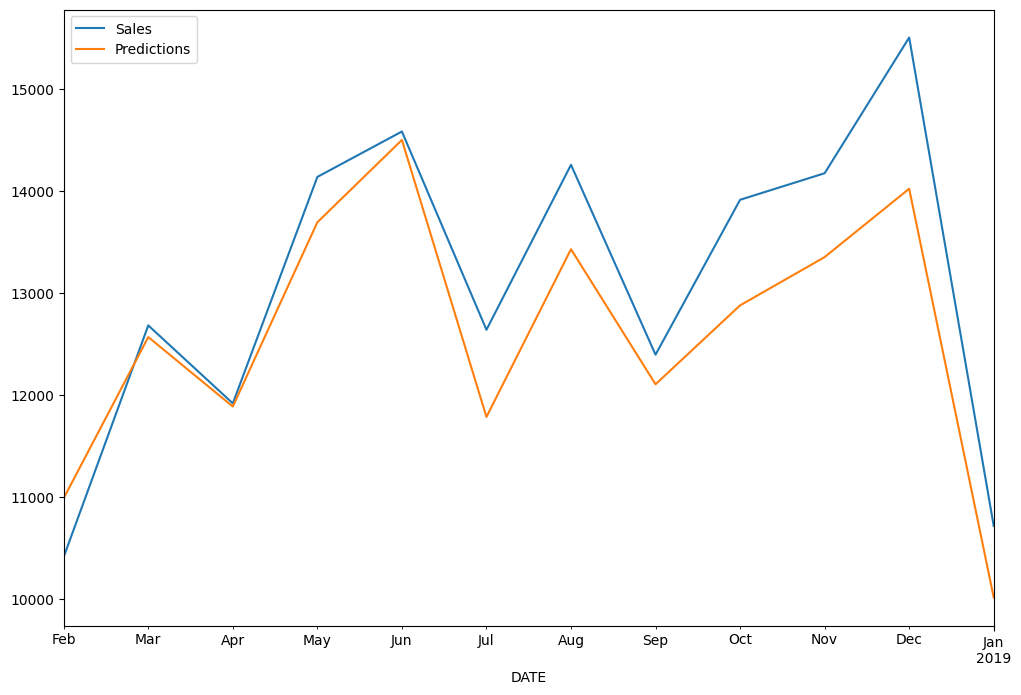

In [42]:
test.plot(figsize=(12,8))